# Whatsapp Group Chat Data Analysis using python

The first step is Data Collection.

Open Whatsapp group chat. Go to Settings. Click on Export Chat. Click on without media.

In [1]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Data cleaning:

This plain text file will have to be parsed and tokenized in a meaningful manner in order to be served (stored) in a Pandas dataframe.

Our main objective is to automatically break down the raw message into 4 tokens.

{Date}, {Time} - {Author}: {Message}

[2019-04-27], [20:58:25]- Vidhi: Hi

### Cleaning date and time:

In [2]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9][0-9]) (AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

### Getting author (or user) details:

In [3]:
def FindAuthor(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False

## Incase of ios use the below code to findauthor:
def FindAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([\w]+)[\u263a-\U0001f999]+:',    # Name and Emoji              
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [4]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [5]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = 'chat1.txt' ## Add your text file here
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

## Incase of ios use the below code:
import datetime
def dateconv(date):
    year=''
    if '-' in date:
        year = date.split('-')[2]
        if len(year) == 4:
            return datetime.datetime.strptime(date, "[%m-%d-%y").strftime("%y-%d-%m")
        elif len(year) ==2:
            return datetime.datetime.strptime(date, "[%m-%d-%y").strftime("%y-%d-%m")
    elif '/' in date:
        year = date.split('/')[2]
        if len(year) == 4:
            return datetime.datetime.strptime(date, "[%m/%d/%y").strftime("%Y-%m-%d")
        if len(year) ==2:
            return datetime.datetime.strptime(date, "[%m/%d/%y").strftime("%Y-%m-%d")
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = df["Date"].apply(dateconv)
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])

In [7]:
df.head()

Date      Time                Author  \
0 2019-04-27   7:04 PM                  None   
1 2019-06-11  12:43 PM                  None   
2 2019-06-11   7:00 PM     +1 (408) 887-5553   
3 2019-06-11   8:22 PM                  None   
4 2019-06-11  10:17 PM  JASKARAN SINGH KOHLI   

                                             Message  
0  Vivek Raje SCU created group "Santa Clara MS A...  
1  +91 90878 60781 joined using this group's invi...  
2                                    <Media omitted>  
3  +91 99103 11929 joined using this group's invi...  
4  Hello Guys , My name is Jaskaran , I got enrol...

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3947 entries, 0 to 3946
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3947 non-null   datetime64[ns]
 1   Time     3947 non-null   object        
 2   Author   3511 non-null   object        
 3   Message  3947 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 123.5+ KB


In [9]:
df.Author.unique()[0:10]

array([None, '+1 (408) 887-5553', 'JASKARAN SINGH KOHLI',
       '+1 (669) 224-9155', 'Vidhi Scu', 'Anish SCU', 'Prashul SCU',
       '+91 96632 52327', '+91 94085 45877', '+91 94795 33857'],
      dtype=object)

In [10]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3511 entries, 2 to 3939
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3511 non-null   datetime64[ns]
 1   Time     3511 non-null   object        
 2   Author   3511 non-null   object        
 3   Message  3511 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 137.1+ KB


In [11]:
df.Author.unique()[0:10]

array(['+1 (408) 887-5553', 'JASKARAN SINGH KOHLI', '+1 (669) 224-9155',
       'Vidhi Scu', 'Anish SCU', 'Prashul SCU', '+91 96632 52327',
       '+91 94085 45877', '+91 94795 33857', '+91 99667 60888'],
      dtype=object)

### Group Wise Stats

In [12]:
total_messages = df.shape[0]
print(total_messages)

3511


In [13]:
media_messages = df[df['Message'] == 'image omitted'].shape[0]
print(media_messages)

0


In [14]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)

In [15]:
emojis = sum(df['emoji'].str.len())
print(emojis)

1214


In [16]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [17]:
links = np.sum(df.urlcount)

In [18]:
print("Group Wise Stats")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Group Wise Stats
Messages: 3511
Media: 0
Emojis: 1214
Links: 89


### Separating the media messages and text messages and sticker messages

In [19]:
media_messages_df = df[df['Message'] == 'image omitted']

In [20]:
sticker_messages_df = df[df['Message'] == 'sticker omitted']
sticker_messages_df

Empty DataFrame
Columns: [Date, Time, Author, Message, emoji, urlcount]
Index: []

In [21]:
messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(sticker_messages_df.index)

In [22]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3511 entries, 2 to 3939
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3511 non-null   datetime64[ns]
 1   Time      3511 non-null   object        
 2   Author    3511 non-null   object        
 3   Message   3511 non-null   object        
 4   emoji     3511 non-null   object        
 5   urlcount  3511 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 192.0+ KB


In [23]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [24]:
messages_df.tail(10)

Date     Time             Author  \
3921 2020-07-07  2:16 PM  +1 (267) 992-5827   
3924 2020-07-07  2:19 PM     Vivek Raje SCU   
3925 2020-07-07  2:21 PM  +1 (408) 893-6718   
3926 2020-07-07  2:24 PM  +1 (919) 381-8325   
3927 2020-07-07  3:12 PM    +91 80855 55808   
3928 2020-07-07  3:13 PM  +1 (408) 893-6718   
3933 2020-07-08  1:33 PM  +1 (408) 334-5556   
3934 2020-07-08  1:34 PM        Aarjav Seth   
3938 2020-07-09  5:13 PM  +1 (408) 306-1254   
3939 2020-07-09  5:22 PM  +1 (669) 243-8555   

                                                Message emoji  urlcount  \
3921  Hi? Does anyone know how to add one of my frie...    []         0   
3924                                                 👍🏻  [👍🏻]         0   
3925  Hey did anyone take Adv OS directly  without h...    []         0   
3926  Thank you for adding me, Qiuguo. Hi all! My na...    []         0   
3927        If advisor approves, I don't see any issues    []         0   
3928                                        Ok, Thanks!    []         0   
3933  We’re sending the email today at exactly 3PM w...    []         0   
3934                           This message was deleted    []         0   
3938  Anyone who took COEN329 Network Technology by ...    []         0   
3939                           This message was deleted    []         0   

      Letter_Count  Word_Count  MessageCount  
3921           244          47             1  
3924             2           1             1  
3925           105          22             1  
3926           602         103             1  
3927            43           8             1  
3928            11           2             1  
3933            86          16             1  
3934            24           4             1  
3938            68          10             1  
3939            24           4             1

In [25]:
messages_df["emojicount"]= df['emoji'].str.len()

## Author wise stats

In [26]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
#l = messages_df.Author.unique()
l = messages_df.Author.unique()[0:10]

for i in range(len(l)):
    # Filtering out messages of particular user
    req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
    print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
    print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Words per message', words_per_message)
  #media conists of media messages
    media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
    print('Media Messages Sent', media)
  #sticker conists of stickers messages
    stickers = sticker_messages_df[sticker_messages_df['Author'] == l[i]].shape[0]
    print('Sticker Messages Sent', stickers)
  # emojis conists of total emojis
    emojis = sum(req_df['emoji'].str.len())
    print('Emojis Sent', emojis)
  #links consist of total links
    links = sum(req_df["urlcount"])   
    print('Links Sent', links)   
    print()

Stats of +1 (408) 887-5553 -
Messages Sent 15
Words per message 20.933333333333334
Media Messages Sent 0
Sticker Messages Sent 0
Emojis Sent 7
Links Sent 4

Stats of JASKARAN SINGH KOHLI -
Messages Sent 7
Words per message 17.285714285714285
Media Messages Sent 0
Sticker Messages Sent 0
Emojis Sent 5
Links Sent 0

Stats of +1 (669) 224-9155 -
Messages Sent 35
Words per message 11.914285714285715
Media Messages Sent 0
Sticker Messages Sent 0
Emojis Sent 24
Links Sent 0

Stats of Vidhi Scu -
Messages Sent 4
Words per message 1.25
Media Messages Sent 0
Sticker Messages Sent 0
Emojis Sent 1
Links Sent 0

Stats of Anish SCU -
Messages Sent 75
Words per message 10.693333333333333
Media Messages Sent 0
Sticker Messages Sent 0
Emojis Sent 14
Links Sent 0

Stats of Prashul SCU -
Messages Sent 31
Words per message 10.741935483870968
Media Messages Sent 0
Sticker Messages Sent 0
Emojis Sent 6
Links Sent 0

Stats of +91 96632 52327 -
Messages Sent 39
Words per message 10.205128205128204
Media Mess

## Most used Emoji in Group

In [27]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

136


In [28]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('😂', 379), ('🤣', 133), ('😅', 56), ('👍🏻', 55), ('👍', 50), ('🇨🇦', 26), ('😊', 22), ('🥳', 21), ('🎉', 19), ('😁', 16), ('😛', 15), ('👇', 15), ('😄', 14), ('🇦🇺', 11), ('👏', 10), ('😝', 9), ('🤔', 9), ('🙌🏻', 9), ('🙏', 9), ('🇺🇸', 9), ('🎂', 9), ('🙂', 8), ('👌', 8), ('⬇', 8), ('🙏🏻', 8), ('👍🏼', 8), ('👏🏻', 8), ('😋', 8), ('✔', 8), ('✋🏻', 7), ('🤟🏼', 7), ('🤝', 7), ('😃', 7), ('😜', 7), ('😐', 7), ('😆', 6), ('😇', 6), ('📝', 6), ('✌🏼', 6), ('🇬🇧', 6), ('✌🏻', 6), ('🙏🏼', 6), ('✅', 5), ('😬', 5), ('🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f', 5), ('✌', 4), ('🙈', 4), ('🇳🇿', 4), ('🙌🏽', 4), ('🔴', 4), ('😎', 4), ('✈', 4), ('🤦🏻\u200d♂', 3), ('🤭', 3), ('☑', 3), ('💰', 3), ('🌝', 3), ('🍰', 3), ('📢', 3), ('🧐', 3), ('😀', 2), ('🙌', 2), ('🇱🇷', 2), ('🤘🏼', 2), ('🔥', 2), ('😶', 2), ('🤟🏻', 2), ('👻', 2), ('✨', 2), ('😓', 2), ('🤷🏻\u200d♂️', 2), ('🤚🏻', 2), ('🤘🏻', 2), ('🙄', 2), ('🍿', 2), ('🤘', 2), ('❤', 2), ('😹', 2), ('🍾', 2), ('🍻', 2), ('😕', 2), ('👆🏻', 2), ('🤐', 2), ('❗', 2), ('🤩', 2), ('👍🏽', 2), ('‼️', 2), ('🙋🏻\u200d♂

In [29]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

emoji  count
0        😂    379
1        🤣    133
2        😅     56
3       👍🏻     55
4        👍     50
..     ...    ...
131  🙋🏻‍♂️      1
132     🙋🏻      1
133     ✍️      1
134      💯      1
135      😑      1

[136 rows x 2 columns]

In [30]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Per user emoji distribution:

In [31]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
#l = messages_df.Author.unique()
l = messages_df.Author.unique()[0:10]

for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    total_emojis_list = list([a for b in dummy_df.emoji for a in b])
    emoji_dict = dict(Counter(total_emojis_list))
    emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
    print('Emoji Distribution for', l[i])
    author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
    fig = px.pie(author_emoji_df, values='count', names='emoji')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

Emoji Distribution for +1 (408) 887-5553


Emoji Distribution for JASKARAN SINGH KOHLI


Emoji Distribution for +1 (669) 224-9155


Emoji Distribution for Vidhi Scu


Emoji Distribution for Anish SCU


Emoji Distribution for Prashul SCU


Emoji Distribution for +91 96632 52327


Emoji Distribution for +91 94085 45877


Emoji Distribution for +91 94795 33857


Emoji Distribution for +91 99667 60888


## Day wise distribution:

In [32]:
def f(i):
    l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(f)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

In [33]:
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show()

## Number of messages as times move on


In [34]:
date_df = messages_df.groupby("Date").sum()
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="Date", y="MessageCount")
fig.update_xaxes(nticks=20)
fig.show()


### Per user message count:

In [35]:
auth = messages_df.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="MessageCount", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"],
             title="Explicit color sequence"
            )

fig.show()

## When are the group members most active?


Text(0, 0.5, 'Time')

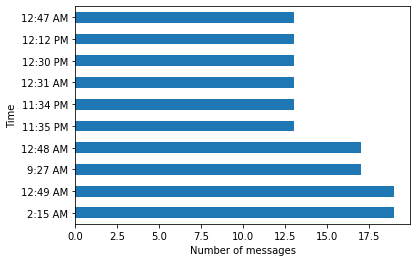

In [36]:

messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')


## The most happening day


2019-11-06    170
2019-07-02    165
2019-07-18    117
2019-06-26    101
2019-06-27     91
             ... 
2019-10-19      1
2020-05-04      1
2020-03-17      1
2019-10-04      1
2019-09-29      1
Name: Date, Length: 274, dtype: int64


Text(0, 0.5, 'Date')

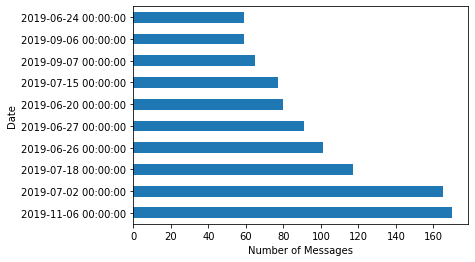

In [37]:
messages_df['Date'].value_counts().head(10).plot.barh()
print(messages_df['Date'].value_counts())
plt.xlabel('Number of Messages')
plt.ylabel('Date')

## Messages having maximum words

In [38]:
messages_df.iloc[messages_df['Word_Count'].argmax()]

Date                                          2019-06-20 00:00:00
Time                                                      2:15 AM
Author                                             Vivek Raje SCU
Message         **Long Post Alert**  My visa interview  Consul...
emoji                                                [✅, 😅, 😅, 🔃]
urlcount                                                        0
Letter_Count                                                 7519
Word_Count                                                   1469
MessageCount                                                    1
emojicount                                                      4
Name: 119, dtype: object

## WordCloud

In [39]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))

There are 273985 words in all the messages.


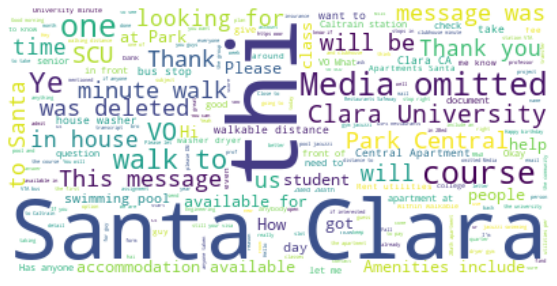

In [40]:
stopwords = set(STOPWORDS)
stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le","ni","lo","Ma","Haa","ni"])
  # Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Each user wordcloud:

Author name +1 (408) 887-5553


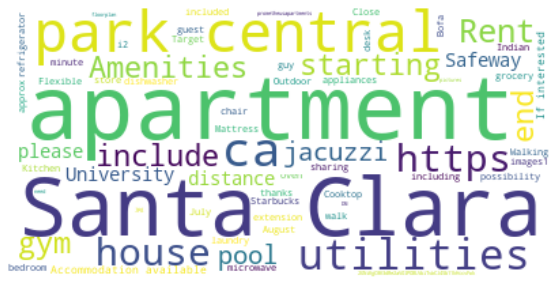

Author name JASKARAN SINGH KOHLI


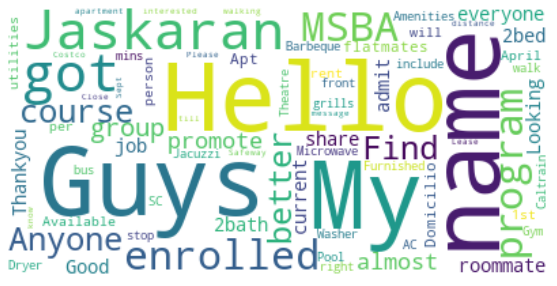

Author name +1 (669) 224-9155


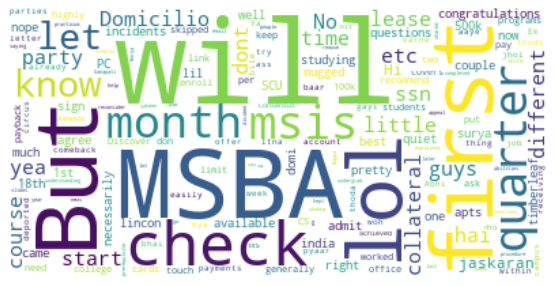

Author name Vidhi Scu


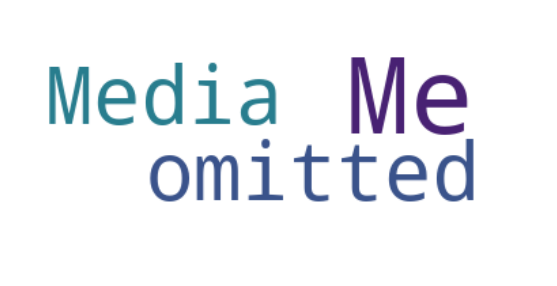

Author name Anish SCU


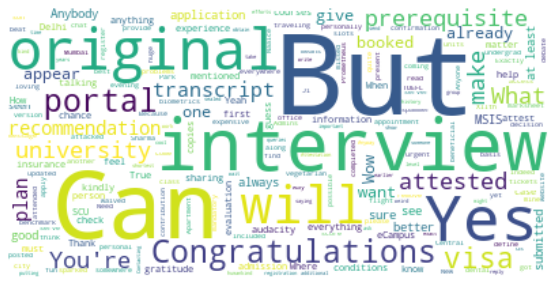

Author name Prashul SCU


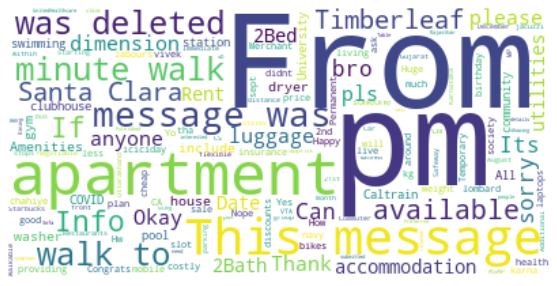

Author name +91 96632 52327


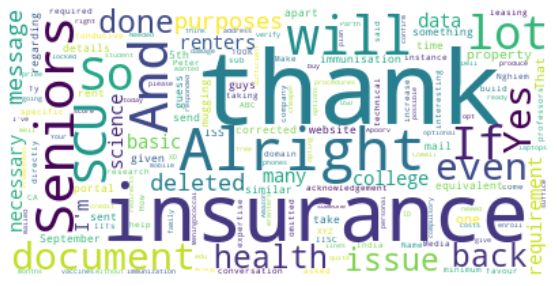

Author name +91 94085 45877


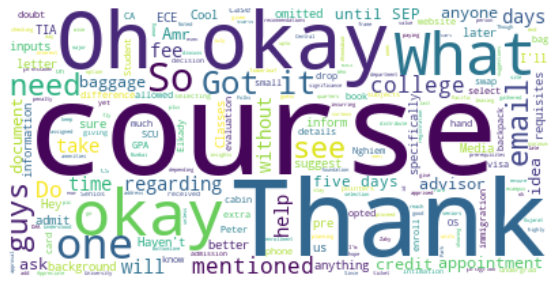

Author name +91 94795 33857


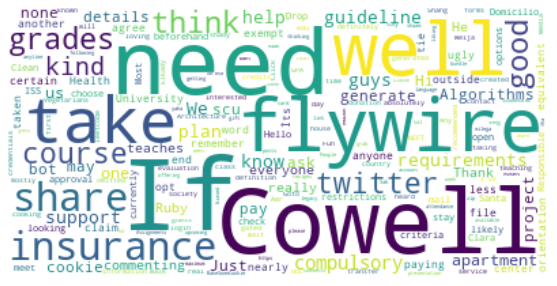

Author name +91 99667 60888


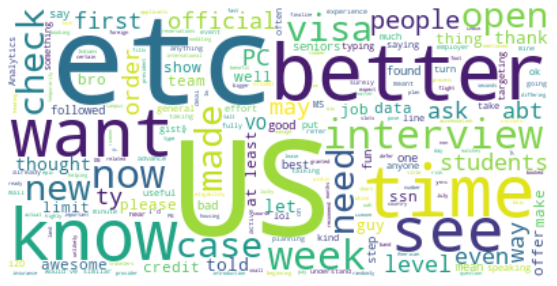

In [41]:
#l = messages_df.Author.unique()
l = messages_df.Author.unique()[0:10]
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)
    stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","anta","kuda","ante","la","eh","Nen","ne","haa","Haa","le"])
  # Generate a word cloud image
    print('Author name',l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()